<a href="https://colab.research.google.com/github/slidwell44/cuddly-octo-invention/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

## Judging a Book by its Cover

1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

In [ ]:
! pip install -q kaggle

In [ ]:
# Choose the kaggle.json file that you downloaded

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"simonmichael44","key":"5585d1e853c51a8c368dce5cd0b435d4"}'}

In [ ]:
# Make directory named kaggle and copy kaggle.json file there.

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                 DAIGT V2 Train Dataset                            29MB  2023-11-16 01:38:36           1709        174  1.0              
derrekdevon/real-estate-sales-2001-2020                         Real Estate Sales 2001-2020                       28MB  2023-12-07 15:36:26           1066         28  1.0              
muhammadbinimran/housing-price-prediction-data                  Housing Price Prediction Data                    763KB  2023-11-21 17:56:32           7561        137  1.0              
jocelyndumlao/cardiovascular-disease-dataset                    Cardiovascu

In [ ]:
! kaggle datasets download -d lukaanicin/book-covers-dataset

 99% 273M/275M [00:09<00:00, 33.9MB/s]
100% 275M/275M [00:09<00:00, 31.0MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip book-covers-dataset.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/book-covers/Stationery/0000930.jpg  
  inflating: train/book-covers/Stationery/0000931.jpg  
  inflating: train/book-covers/Stationery/0000932.jpg  
  inflating: train/book-covers/Stationery/0000933.jpg  
  inflating: train/book-covers/Stationery/0000934.jpg  
  inflating: train/book-covers/Stationery/0000935.jpg  
  inflating: train/book-covers/Stationery/0000936.jpg  
  inflating: train/book-covers/Stationery/0000937.jpg  
  inflating: train/book-covers/Stationery/0000938.jpg  
  inflating: train/book-covers/Stationery/0000939.jpg  
  inflating: train/book-covers/Stationery/0000940.jpg  
  inflating: train/book-covers/Stationery/0000941.jpg  
  inflating: train/book-covers/Stationery/0000942.jpg  
  inflating: train/book-covers/Stationery/0000943.jpg  
  inflating: train/book-covers/Stationery/0000944.jpg  
  inflating: train/book-covers/Stationery/0000945.jpg  
  inflating: train/book-covers/Stationery/0000946.jpg

In [ ]:
import os

data_dir = '/content/train/book-covers'

# Ensures directory exists
if not os.path.exists(data_dir):
  print("Path does not exist.")
else:
  print(f"Path: {data_dir} exists")

Path: /content/train/book-covers exists


In [ ]:
genres = os.listdir(data_dir)

for genre in genres:
  print(genre)

Science-Geography
Business-Finance-Law
Religion
Science-Fiction-Fantasy-Horror
Travel-Holiday-Guides
Reference
Personal-Development
Crime-Thriller
Natural-History
Medical
Transport
Romance
Teaching-Resources-Education
Society-Social-Sciences
Teen-Young-Adult
History-Archaeology
Home-Garden
Food-Drink
Dictionaries-Languages
Humour
Crafts-Hobbies
Biography
Graphic-Novels-Anime-Manga
Childrens-Books
Sport
Health
Technology-Engineering
Stationery
Art-Photography
Poetry-Drama
Mind-Body-Spirit
Computing
Entertainment


## Dealing w/ Compute
So I think the image quality is too poor to train the model on or there are too many genres for this relatively simple deep learning model... So we are going to sample the set of 33 genres for just 5 random genres and see what we get and turn up the pixel ratio

In [ ]:
# import random
# def get_random_genres(genres, total_genres):
#   random_genres = []
#   while len(random_genres) < total_genres:
#     random_genre = random.choice(genres)
#     if random_genre not in random_genres:
#       random_genres.append(random_genre)
#   return random_genres

In [ ]:
total_genres = 3

# this_genres = get_random_genres(genres=genres, total_genres=total_genres)

this_genres = ["Food-Drink", "Personal-Development", "Poetry-Drama"]

for genre in this_genres:
  print(genre)

Food-Drink
Personal-Development
Poetry-Drama


In [ ]:
# we want to ensure high-quality photos after resizing so ensure latest version of pillow
# ! pip install --upgrade pillow

Before feeding images into your model, they should be properly preprocessed. This typically includes resizing images to a uniform size, converting them to arrays, and normalizing pixel values.

 Here's a breakdown of how different image sizes might impact the model:

**Image Size: 64x64**
* Pros: Lower memory and computational requirements. Faster training.
* Cons: Limited information. Smaller images mean fewer pixels and less detail, which can lead to poorer model performance, especially for complex tasks where details are crucial.

**Image Size: 128x128**
* Pros: More detailed information. The increased size allows the model to capture more features and nuances in the images, potentially leading to better performance.
* Cons: Higher memory and computational requirements. Training might be slower, and larger batch sizes might not be feasible on limited hardware.

**General Considerations:**
* Model Complexity: A more complex model might be needed to extract and learn from the finer details in larger images.
* Task Specificity: The importance of image size also depends on the specific task. For tasks where details are crucial (like distinguishing between similar book covers), larger images might be more beneficial.
* Hardware Constraints: Larger images will require more memory and computational power. You'll need to balance the image size with what your hardware can handle.

**Experimentation and Trade-offs:**
* Balancing Act: You often have to balance the quality and quantity of input data with the available computational resources. In your case, testing both 64x64 and 128x128 sizes (if feasible) would provide valuable insights into this trade-off.
* Data Augmentation: Regardless of the size, data augmentation can help improve model performance, especially in preventing overfitting and enhancing the model's ability to generalize.

## Dealing w/ Compute Pt 2

In this modified function, undersample_ratio=0.6 specifies that 60% of the images per genre will be randomly selected. The random.sample function is used to randomly select the subset of images from each genre. If you have specific genres in my_genres, only those genres will be processed, and the undersampling will apply to each of them.



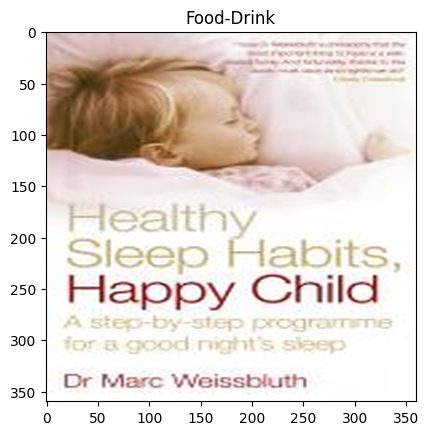

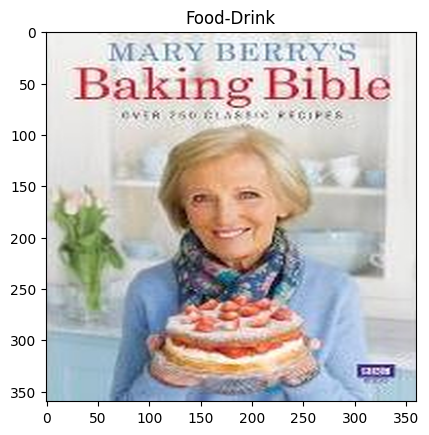

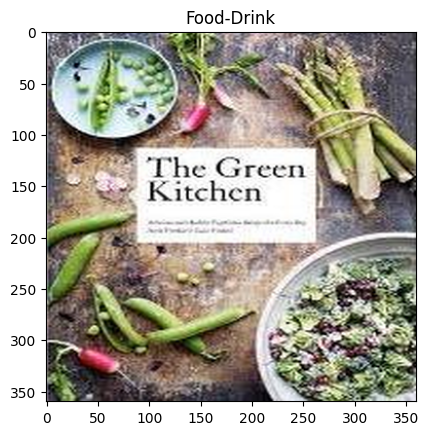

In [ ]:
from PIL import Image
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import random

def process_images(data_dir, target_size, my_genres, undersample_ratio, visualize_sample):
    images = []
    labels = []

    # Counter to limit the number of images visualized
    num_visualized = 0

    for genre in my_genres:
        genre_dir = os.path.join(data_dir, genre)
        if os.path.isdir(genre_dir):
            all_images = os.listdir(genre_dir)
            # Filter out non-image files
            all_images = [img for img in all_images if img.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]
            # Randomly sample a subset of images
            sampled_images = random.sample(all_images, int(len(all_images) * undersample_ratio))

            for img_file in sampled_images:
                img_path = os.path.join(genre_dir, img_file)
                try:
                    with Image.open(img_path) as img:
                        img = img.convert('RGB')  # Convert to RGB
                        img = img.resize(target_size, Image.LANCZOS)  # High-quality downsampling filter
                        img_array = img_to_array(img)
                        img_array /= 255.0  # Normalize to [0, 1]
                        images.append(img_array)
                        labels.append(genre)

                        # Visualize the first few processed images
                        if visualize_sample and num_visualized < total_genres:
                            plt.imshow(img_array)
                            plt.title(genre)
                            plt.show()
                            num_visualized += 1

                except OSError as e:
                    print(f"Failed to open or process {img_path}. Error: {e}")

    return images, labels

target_size = (360, 360)  # You can adjust the target size if needed

# Enable visualization for debugging
images, labels = process_images(data_dir, target_size, this_genres, undersample_ratio=0.6, visualize_sample=True)


In [ ]:
print(f'In dataset Images: {len(images)}, Labels: {len(labels)}')

In dataset Images: 1779, Labels: 1779


In [ ]:
# check type
print(type(labels))
print(type(images))

<class 'list'>
<class 'list'>


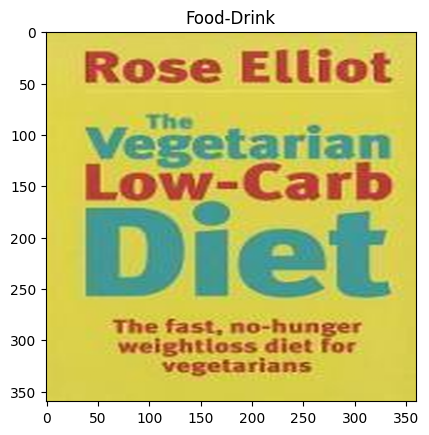

In [ ]:
import random
import matplotlib.pyplot as plt

# Randomly sample an image
random_index = random.randint(0, len(images) - 1)
sampled_image = images[random_index]
sampled_label = labels[random_index]

# Plot the sampled image
plt.imshow(sampled_image)
plt.title(sampled_label)
plt.show()


In [ ]:
from collections import Counter

# Count how many instances there are for each label
label_counts = Counter(labels)

# Print the counts to check for imbalance
print(label_counts)

Counter({'Poetry-Drama': 594, 'Food-Drink': 593, 'Personal-Development': 592})


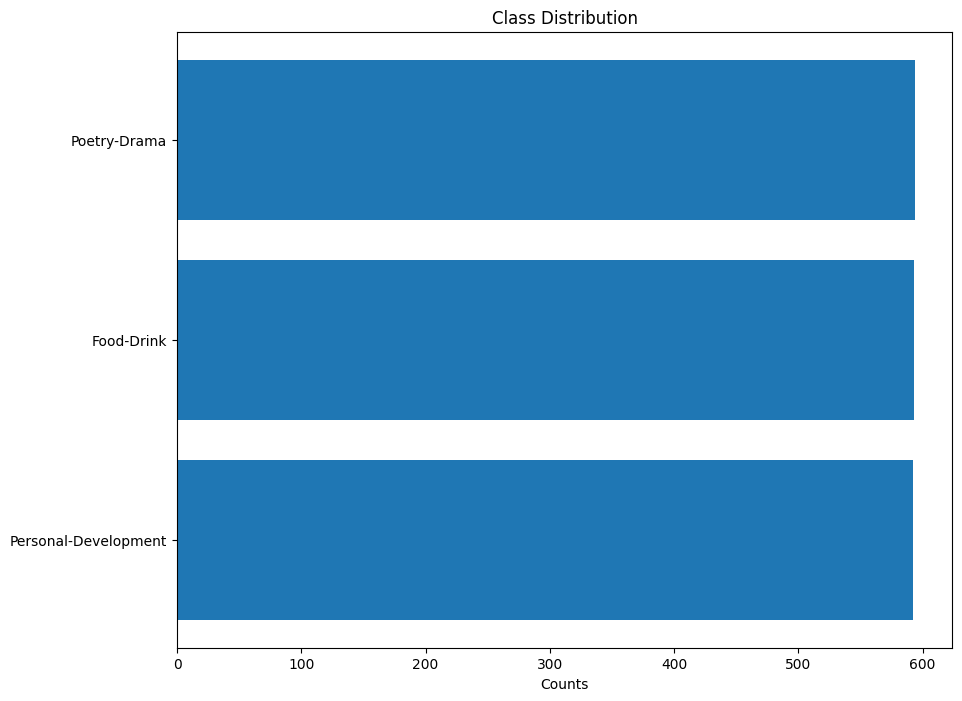

In [ ]:
import matplotlib.pyplot as plt

# Sort the counts from greatest to least
sorted_label_counts = dict(sorted(label_counts.items(), key=lambda item: item[1], reverse=True))

# Plot
plt.figure(figsize=(10, 8))
plt.barh(list(sorted_label_counts.keys()), list(sorted_label_counts.values()))
plt.xlabel('Counts')
plt.title('Class Distribution')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()

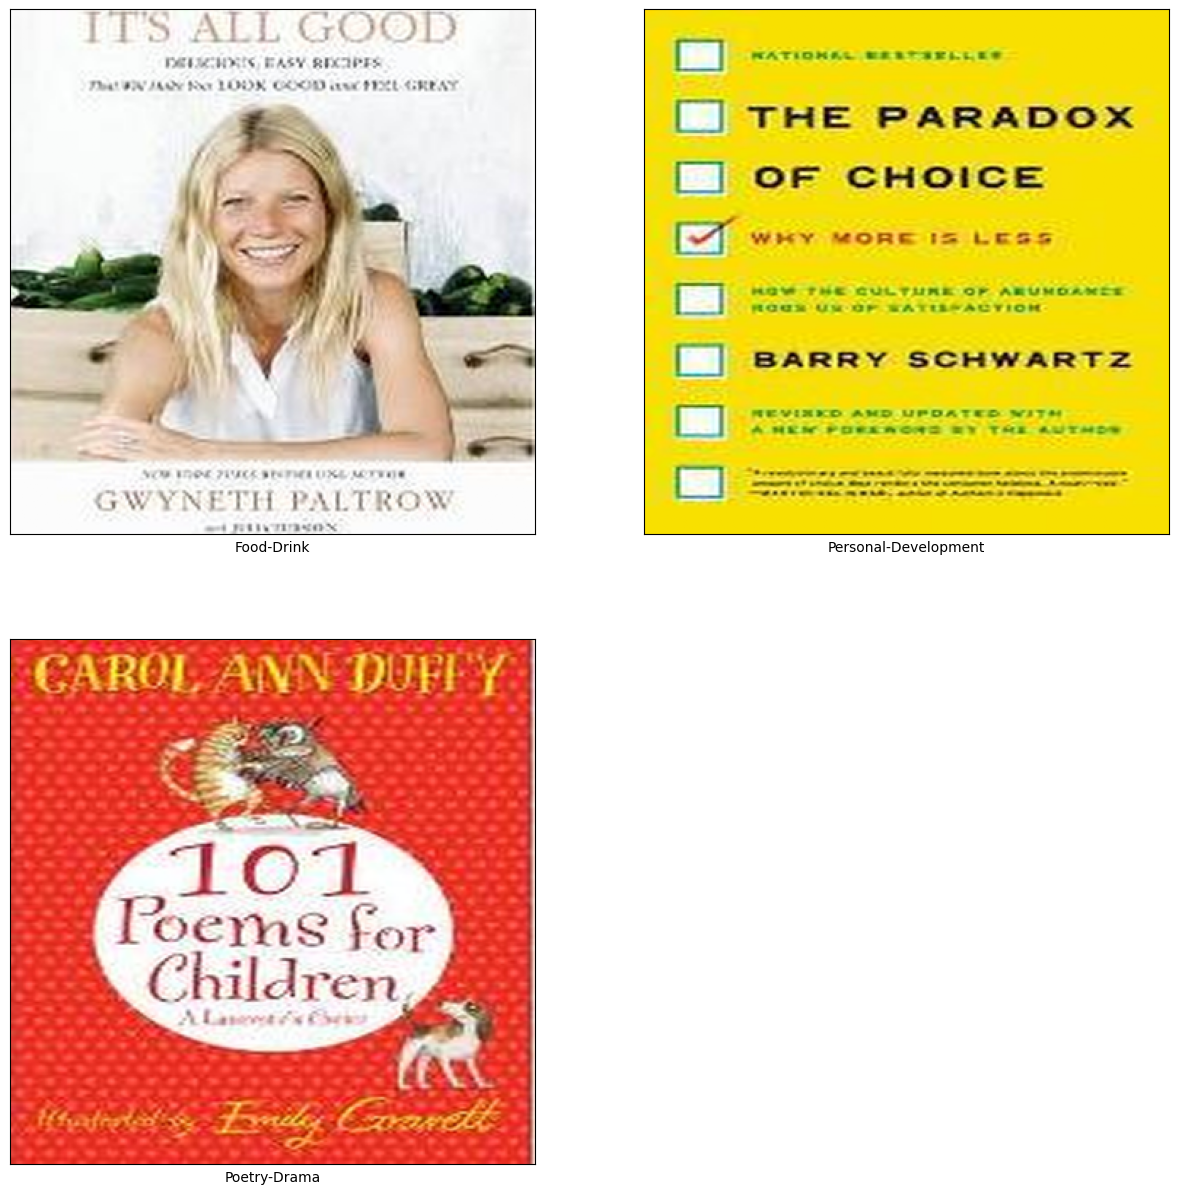

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import random

# Convert labels and images to a pandas dataframe
df = pd.DataFrame(list(zip(images, labels)), columns =['image', 'label'])

# Get a list of unique genres
unique_genres = df.label.unique()

# Get the number of unique genres
num_genres = len(unique_genres)

# Calculate the square root of the number of unique genres
sqrt_genres = math.sqrt(num_genres)

# Calculate the dimensions for the subplots grid
# The grid will be a square with side length of the rounded up square root of the number of unique genres
grid_size = math.ceil(sqrt_genres)

plt.figure(figsize = (15.0, 15.0))

for i, genre in enumerate(unique_genres):
    # Get a random image from the current genre
    sample_image = random.choice(df[df['label'] == genre]['image'].tolist())
    plt.subplot(grid_size, grid_size, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_image)
    plt.xlabel(genre)

plt.show()

In [ ]:
from numpy import array

# Convert images to a numpy array
images = array(images)

# Convert labels to a numpy array
labels = array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit the label encoder and transform the labels to encoded integers
train_labels_encoded = label_encoder.fit_transform(train_labels)
# Transform validation labels with the same encoder
val_labels_encoded = label_encoder.transform(val_labels)

In [ ]:
# Verify the encoded values
print(label_encoder.inverse_transform(train_labels_encoded))
print(label_encoder.inverse_transform(val_labels_encoded))

['Personal-Development' 'Personal-Development' 'Food-Drink' ...
 'Personal-Development' 'Poetry-Drama' 'Personal-Development']
['Poetry-Drama' 'Food-Drink' 'Poetry-Drama' 'Personal-Development'
 'Food-Drink' 'Food-Drink' 'Food-Drink' 'Personal-Development'
 'Poetry-Drama' 'Poetry-Drama' 'Poetry-Drama' 'Food-Drink'
 'Personal-Development' 'Food-Drink' 'Personal-Development'
 'Personal-Development' 'Personal-Development' 'Food-Drink'
 'Personal-Development' 'Personal-Development' 'Food-Drink' 'Food-Drink'
 'Personal-Development' 'Personal-Development' 'Personal-Development'
 'Food-Drink' 'Personal-Development' 'Food-Drink' 'Food-Drink'
 'Poetry-Drama' 'Personal-Development' 'Personal-Development'
 'Poetry-Drama' 'Personal-Development' 'Food-Drink' 'Poetry-Drama'
 'Personal-Development' 'Food-Drink' 'Personal-Development' 'Poetry-Drama'
 'Food-Drink' 'Poetry-Drama' 'Food-Drink' 'Personal-Development'
 'Poetry-Drama' 'Personal-Development' 'Poetry-Drama' 'Poetry-Drama'
 'Poetry-Drama' 'Poe

One-hot encoding is a technique that is used to convert categorical variables into a form that is more suitable for machine learning models. It does this by creating a new column for each category, and setting the value of the column to 1 if the data point belongs to that category and 0 otherwise.

In [ ]:
# ! pip install --upgrade tensorflow

In [ ]:
# one-hot encode the categorical variables
from tensorflow.keras.utils import to_categorical

num_classes = len(label_encoder.classes_)
print(f"Length of num_classes is: {num_classes}")
train_labels_one_hot = to_categorical(train_labels_encoded, num_classes=num_classes)
# One-hot encode the validation labels
val_labels_one_hot = to_categorical(val_labels_encoded, num_classes=num_classes)

Length of num_classes is: 3


## Simple Model

In [ ]:
# # So the last model was too complex causing overfitting, lets go back to something simple

# from tensorflow.keras.layers import Dropout, BatchNormalization, Input, Conv2D, MaxPooling2D, Flatten, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.regularizers import l2

# input_shape = (360, 360, 3)
# inputs = Input(shape=input_shape)

# # First Conv Block
# x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
# x = BatchNormalization()(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)

# # Second Conv Block
# x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)

# # Flatten and Dense Layers
# x = Flatten()(x)
# x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)

# # Output Layer
# outputs = Dense(num_classes, activation='softmax')(x)

# # Construct the model
# SimpleModel = Model(inputs=inputs, outputs=outputs)

# # Compile the model
# SimpleModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Set up EarlyStopping
# early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# SimpleModelHistory = SimpleModel.fit(
#     train_images,
#     train_labels_one_hot,
#     epochs=100,  # Set a high epoch and let EarlyStopping decide when to stop
#     batch_size=64,  # Increase batch size if your hardware can handle it
#     validation_data=(val_images, val_labels_one_hot),
#     callbacks=[early_stopper]  # Add EarlyStopping to the callbacks
# )


Epoch 1/100
23/23 [==============================] - 21s 311ms/step - loss: 13.9941 - accuracy: 0.3872 - val_loss: 17.3632 - val_accuracy: 0.3399
Epoch 2/100
23/23 [==============================] - 5s 212ms/step - loss: 15.5755 - accuracy: 0.4526 - val_loss: 13.1472 - val_accuracy: 0.4017
Epoch 3/100
23/23 [==============================] - 5s 212ms/step - loss: 10.7304 - accuracy: 0.4982 - val_loss: 9.1535 - val_accuracy: 0.3511
Epoch 4/100
23/23 [==============================] - 5s 212ms/step - loss: 7.3084 - accuracy: 0.5257 - val_loss: 6.8043 - val_accuracy: 0.3511
Epoch 5/100
23/23 [==============================] - 5s 211ms/step - loss: 5.3955 - accuracy: 0.5285 - val_loss: 5.8890 - val_accuracy: 0.3511
Epoch 6/100
23/23 [==============================] - 5s 213ms/step - loss: 4.2455 - accuracy: 0.5425 - val_loss: 5.0455 - val_accuracy: 0.3511
Epoch 7/100
23/23 [==============================] - 5s 213ms/step - loss: 3.5367 - accuracy: 0.5587 - val_loss: 5.0378 - val_accuracy: 

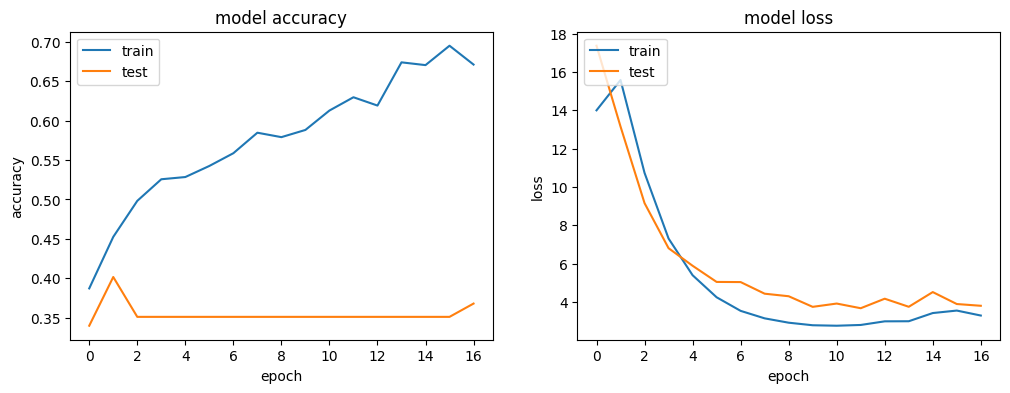

In [ ]:
# import matplotlib.pyplot as plt

# # plot training & validation accuracy values
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(SimpleModelHistory.history['accuracy'])
# plt.plot(SimpleModelHistory.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')

# # plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(SimpleModelHistory.history['loss'])
# plt.plot(SimpleModelHistory.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')

# plt.show()

### Conclusions

* **Batch Size:** Experiment with different batch sizes. Sometimes a smaller batch size can lead to better estimates of the gradient.

## Simple Model V2

* **Add L1/L2 Regularization to Convolutional Layers:** Regularization in convolutional layers can also help reduce overfitting.

* **Adjust Dropout Rates:** Experimentation with different dropout rates. Sometimes a slight increase in the dropout rate can help the model generalize better.

* **Kernel Regularizer in Dense Layers:** Already added L2 regularization to the dense layers. Adjust the regularization factor based on how the model performs.

* **Activity Regularization:** In addition to kernel regularization,
activity regularization can also be used in dense layers.

In [ ]:
# from tensorflow.keras.layers import Dropout, BatchNormalization, Input, Conv2D, MaxPooling2D, Flatten, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.regularizers import l1_l2

# input_shape = (360, 360, 3)
# inputs = Input(shape=input_shape)

# # Helper function for Conv2D Block
# def add_conv_block(x, filters, kernel_size, reg_factor=0.01):
#     x = Conv2D(filters, kernel_size, padding='same', activation='relu',
#                kernel_regularizer=l1_l2(l1=reg_factor, l2=reg_factor))(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling2D(pool_size=(2, 2))(x)
#     x = Dropout(0.3)(x)  # Slightly higher dropout
#     return x

# # Convolutional Blocks
# x = add_conv_block(inputs, 32, (3, 3))
# x = add_conv_block(x, 64, (3, 3))

# # Flatten and Dense Layers
# x = Flatten()(x)
# x = Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01),
#           activity_regularizer=l1_l2(l1=0.01, l2=0.01))(x)  # Added activity regularizer
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)

# # Output Layer
# outputs = Dense(num_classes, activation='softmax')(x)

# # Construct the model
# SimpleModel = Model(inputs=inputs, outputs=outputs)

# # Compile the model
# SimpleModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

* **Decreased Batch Size from 64 to 32**

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Set up EarlyStopping
# early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# SimpleModelHistory = SimpleModel.fit(
#     train_images,
#     train_labels_one_hot,
#     epochs=50,  # Set a high epoch and let EarlyStopping decide when to stop
#     batch_size=32,  # Increase batch size if your hardware can handle it
#     validation_data=(val_images, val_labels_one_hot),
#     callbacks=[early_stopper]  # Add EarlyStopping to the callbacks
# )

Epoch 1/50
45/45 [==============================] - 20s 159ms/step - loss: 733.9512 - accuracy: 0.3523 - val_loss: 807.1990 - val_accuracy: 0.3511
Epoch 2/50
45/45 [==============================] - 5s 111ms/step - loss: 377.9819 - accuracy: 0.3404 - val_loss: 2342.1560 - val_accuracy: 0.3511
Epoch 3/50
45/45 [==============================] - 5s 111ms/step - loss: 371.8259 - accuracy: 0.3368 - val_loss: 10085.0898 - val_accuracy: 0.3511
Epoch 4/50
45/45 [==============================] - 5s 111ms/step - loss: 317.1679 - accuracy: 0.3277 - val_loss: 16824.1699 - val_accuracy: 0.3315
Epoch 5/50
45/45 [==============================] - 5s 110ms/step - loss: 403.4227 - accuracy: 0.3509 - val_loss: 4171.8784 - val_accuracy: 0.3034
Epoch 6/50
45/45 [==============================] - 5s 118ms/step - loss: 331.6588 - accuracy: 0.3439 - val_loss: 4200.3540 - val_accuracy: 0.3511


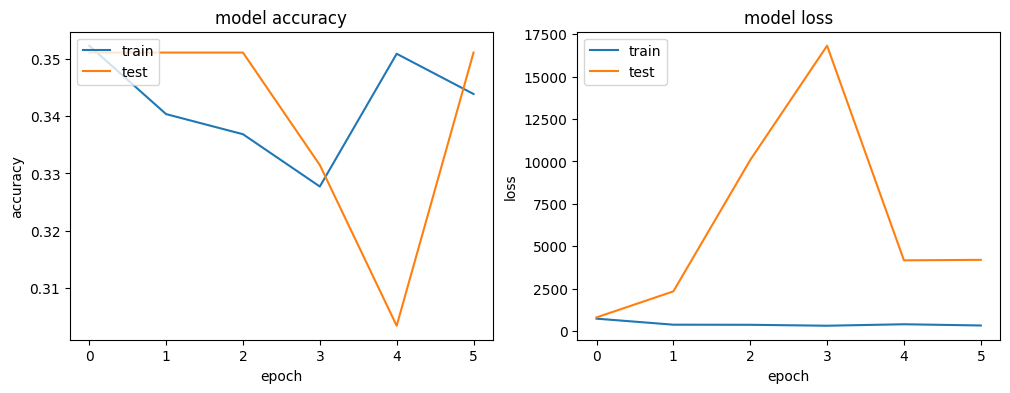

In [ ]:
# import matplotlib.pyplot as plt

# # plot training & validation accuracy values
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(SimpleModelHistory.history['accuracy'])
# plt.plot(SimpleModelHistory.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')

# # plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(SimpleModelHistory.history['loss'])
# plt.plot(SimpleModelHistory.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')

# plt.show()

### Conclusions

This model is performing poorly compared to the last, likely due to over-regularization. When loss values are exceedingly high, as in this case, it's a sign that the model's learning capacity is heavily constrained.

* **Reduce Regularization:** The L1 and L2 regularization factors are probably too high, which is causing the model's weights to be penalized too much, leading to underfitting

* **Learning Rate:** If the learning rate is too high, the model might be "jumping" over minima in the loss landscape

* **Optimizer:** Experiment with different optimizers. For example, RMSprop or SGD with momentum might yield better results in some cases.

## Simple Model V3

* **Adjust Regularization:** Fine-tune the regularization factors in both the convolutional and dense layers.

* **Use Global Average Pooling:** Replace Flatten with Global Average Pooling to reduce the total number of parameters in the model.

In [ ]:
# from tensorflow.keras.layers import (
#     Dropout, BatchNormalization,
#     Input, Conv2D, MaxPooling2D,
#     Flatten, Dense, GlobalAveragePooling2D
# )
# from tensorflow.keras.models import Model
# from tensorflow.keras.regularizers import l1_l2

# input_shape = (360, 360, 3)
# inputs = Input(shape=input_shape)

# # Helper function for Conv2D Block
# def add_conv_block(x, filters, kernel_size, reg_factor=0.001):  # reduced regularization factor
#     x = Conv2D(filters, kernel_size, padding='same', activation='relu',kernel_regularizer=l1_l2(l1=reg_factor, l2=reg_factor))(x)
#     x = BatchNormalization()(x)
#     x = MaxPooling2D(pool_size=(2, 2))(x)
#     x = Dropout(0.3)(x)
#     return x

# # Convolutional Blocks
# x = add_conv_block(inputs, 32, (3, 3))
# x = add_conv_block(x, 64, (3, 3))

# # Replacing the Flatten layer with Global Average Pooling
# x = GlobalAveragePooling2D()(x)

# # Dense Layers
# x = Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(x)  # reduced regularization
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)

# # Output Layer
# outputs = Dense(num_classes, activation='softmax')(x)

# # Construct the model
# SimpleModel = Model(inputs=inputs, outputs=outputs)

# # Compile the model
# SimpleModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Set up EarlyStopping
# early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# SimpleModelHistory = SimpleModel.fit(
#     train_images,
#     train_labels_one_hot,
#     epochs=50,  # Set a high epoch and let EarlyStopping decide when to stop
#     batch_size=32,  # Increase batch size if your hardware can handle it
#     validation_data=(val_images, val_labels_one_hot),
#     callbacks=[early_stopper]  # Add EarlyStopping to the callbacks
# )

Epoch 1/50
45/45 [==============================] - 19s 140ms/step - loss: 3.1641 - accuracy: 0.3741 - val_loss: 2.6757 - val_accuracy: 0.3399
Epoch 2/50
45/45 [==============================] - 4s 97ms/step - loss: 2.9696 - accuracy: 0.3875 - val_loss: 2.5723 - val_accuracy: 0.3511
Epoch 3/50
45/45 [==============================] - 4s 97ms/step - loss: 2.8732 - accuracy: 0.3657 - val_loss: 2.5021 - val_accuracy: 0.3989
Epoch 4/50
45/45 [==============================] - 4s 97ms/step - loss: 2.7130 - accuracy: 0.3769 - val_loss: 2.4466 - val_accuracy: 0.3287
Epoch 5/50
45/45 [==============================] - 4s 97ms/step - loss: 2.6160 - accuracy: 0.3657 - val_loss: 2.3825 - val_accuracy: 0.3258
Epoch 6/50
45/45 [==============================] - 4s 97ms/step - loss: 2.4859 - accuracy: 0.3826 - val_loss: 2.3683 - val_accuracy: 0.3118
Epoch 7/50
45/45 [==============================] - 4s 97ms/step - loss: 2.4202 - accuracy: 0.3776 - val_loss: 2.2687 - val_accuracy: 0.3455
Epoch 8/50


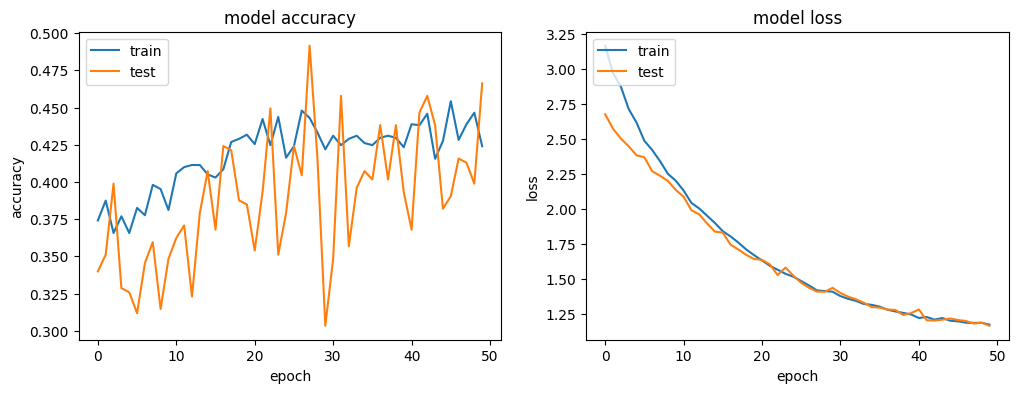

In [ ]:
# import matplotlib.pyplot as plt

# # plot training & validation accuracy values
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(SimpleModelHistory.history['accuracy'])
# plt.plot(SimpleModelHistory.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')

# # plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(SimpleModelHistory.history['loss'])
# plt.plot(SimpleModelHistory.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')

# plt.show()

### Conclusions
The charts show that the model's performance on the training set is improving over time, which is good. However, the performance on the validation set (test set) is quite noisy, which suggests that the model might still be struggling to generalize well to unseen data.

#### Things we can try...

* **Data Augmentation:** Implement data augmentation. This can involve transformations like rotations, zooming, shifts, and flips to make your model more robust to variations in the input data.

* **Learning Rate Schedule:** Implement a learning rate schedule that decreases the learning rate over time. Sometimes a high learning rate can cause the model to converge too quickly to a suboptimal solution, or it can cause the training process to be unstable. A learning rate schedule can help mitigate these issues.

## SimpleModel V4

Implementing:

* **Learning Rate Schedule**
  * We're going to use the ```ReduceLROnPlateau```


In [ ]:
from tensorflow.keras.layers import (
    Dropout, BatchNormalization,
    Input, Conv2D, MaxPooling2D,
    Flatten, Dense, GlobalAveragePooling2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam

input_shape = (360, 360, 3)
inputs = Input(shape=input_shape)

# Helper function for Conv2D Block
def add_conv_block(x, filters, kernel_size, reg_factor=0.001):  # reduced regularization factor
    x = Conv2D(filters, kernel_size, padding='same', activation='relu',kernel_regularizer=l1_l2(l1=reg_factor, l2=reg_factor))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.3)(x)
    return x

# Convolutional Blocks
x = add_conv_block(inputs, 32, (3, 3))
x = add_conv_block(x, 64, (3, 3))

# Replacing the Flatten layer with Global Average Pooling
x = GlobalAveragePooling2D()(x)

# Dense Layers
x = Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001))(x)  # reduced regularization
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output Layer
outputs = Dense(num_classes, activation='softmax')(x)

# Construct the model
SimpleModel = Model(inputs=inputs, outputs=outputs)

# Define your desired learning rate
learning_rate = 0.01

# Create an Adam optimizer with the desired learning rate
adam_optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the custom optimizer
SimpleModel.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

This setup allows your model to attempt to escape potential plateaus in the optimization landscape by reducing the learning rate before deciding to stop training if no further improvements are observed.

* **Increase Initial Learning Rate:** Using the default learning rate for Adam (0.001), so lets start with a higher one, like 0.01, and let ReduceLROnPlateau decrease it as needed.

* **Adjust factor:** If you want a less aggressive reduction, you can set factor to a value closer to 1 (e.g., 0.5 or 0.8). This will reduce the learning rate by a smaller percentage each time. We're going to start with 0.2

* **Increase patience:** Increasing ```patience``` will give the model more time to improve before the learning rate is reduced. A higher ```patience``` works in tandem with ```EarlyStopping``` and should be set accordingly.

* **Change min_lr:** set to 0.0001

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set up EarlyStopping
early_stopper = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

SimpleModelHistory = SimpleModel.fit(
    train_images,
    train_labels_one_hot,
    epochs=100,
    batch_size=32,
    validation_data=(val_images, val_labels_one_hot),
    callbacks=[early_stopper, reduce_lr]  # Add reduce_lr to the callbacks
)

Epoch 1/100
45/45 [==============================] - 19s 139ms/step - loss: 2.9989 - accuracy: 0.4062 - val_loss: 3.1009 - val_accuracy: 0.3287 - lr: 0.0100
Epoch 2/100
45/45 [==============================] - 4s 100ms/step - loss: 2.2769 - accuracy: 0.4216 - val_loss: 1.9445 - val_accuracy: 0.3567 - lr: 0.0100
Epoch 3/100
45/45 [==============================] - 5s 101ms/step - loss: 1.8334 - accuracy: 0.4223 - val_loss: 1.6735 - val_accuracy: 0.3511 - lr: 0.0100
Epoch 4/100
45/45 [==============================] - 5s 101ms/step - loss: 1.6254 - accuracy: 0.4357 - val_loss: 1.5823 - val_accuracy: 0.3511 - lr: 0.0100
Epoch 5/100
45/45 [==============================] - 5s 100ms/step - loss: 1.5621 - accuracy: 0.4392 - val_loss: 1.4983 - val_accuracy: 0.4354 - lr: 0.0100
Epoch 6/100
45/45 [==============================] - 4s 100ms/step - loss: 1.5301 - accuracy: 0.4420 - val_loss: 1.6071 - val_accuracy: 0.3652 - lr: 0.0100
Epoch 7/100
45/45 [==============================] - 4s 100ms/s

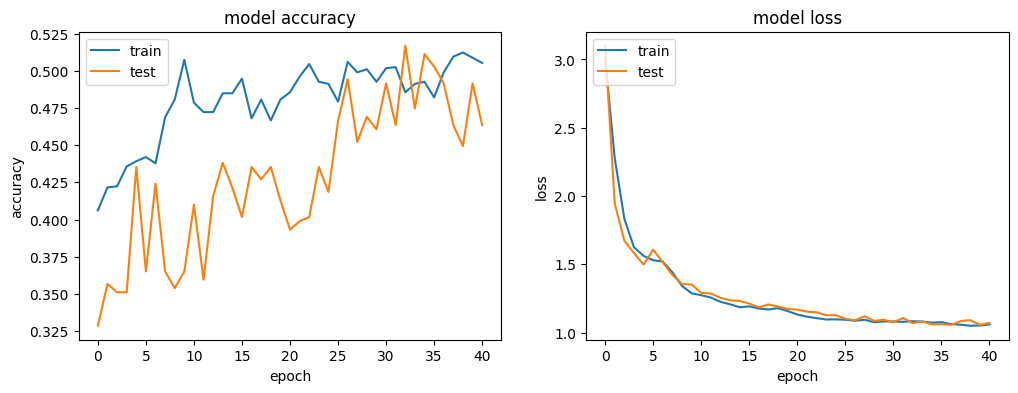

In [ ]:
import matplotlib.pyplot as plt

# plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(SimpleModelHistory.history['accuracy'])
plt.plot(SimpleModelHistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(SimpleModelHistory.history['loss'])
plt.plot(SimpleModelHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

12/12 [==============================] - 0s 22ms/step


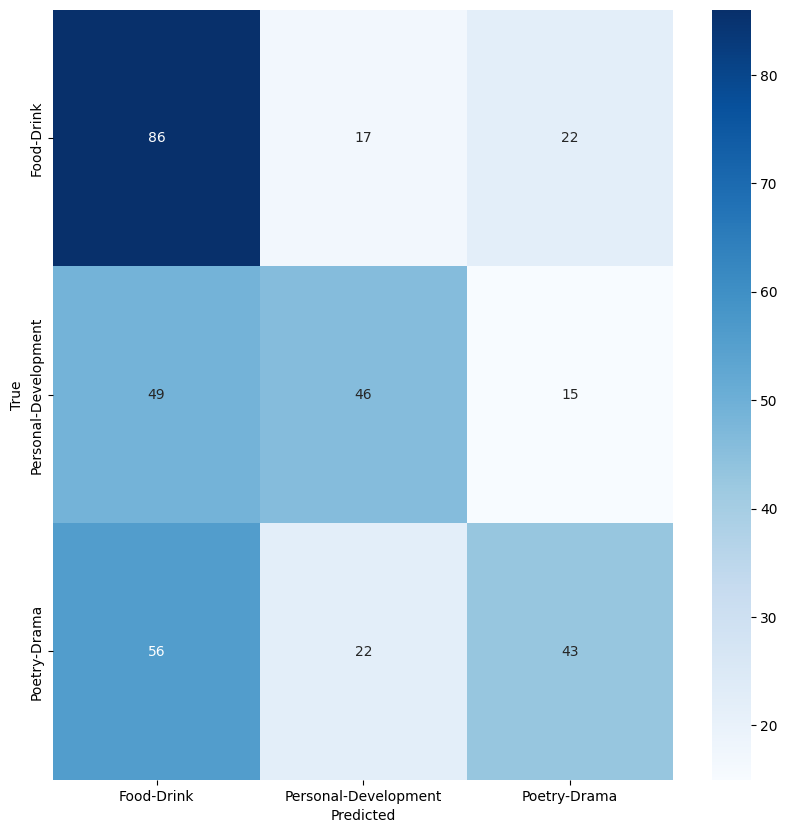

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'val_images' is your validation set and 'val_labels' are the true labels
# First, you need to get predictions from your model
predictions = SimpleModel.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(val_labels_one_hot, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

class_names = list(label_encoder.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Natural-History:**

* 13 instances were correctly classified as Natural-History.
* The model incorrectly classified 19 instances of other classes as Natural-History.
* There are no instances where Natural-History was misclassified as another genre.

**Transport:**

* 27 instances were correctly classified as Transport.
* The model incorrectly classified 6 instances of other classes as Transport.
* 88 instances of Transport were misclassified as Travel-Holiday-Guides, indicating a significant confusion between these two classes.

**Travel-Holiday-Guides:**

* 103 instances were correctly classified as Travel-Holiday-Guides.
* The model incorrectly classified 10 instances of other classes as Travel-Holiday-Guides.
* There are no instances where Travel-Holiday-Guides was misclassified as another genre.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes, target_names=class_names))

                      precision    recall  f1-score   support

          Food-Drink       0.45      0.69      0.54       125
Personal-Development       0.54      0.42      0.47       110
        Poetry-Drama       0.54      0.36      0.43       121

            accuracy                           0.49       356
           macro avg       0.51      0.49      0.48       356
        weighted avg       0.51      0.49      0.48       356



### Conclusions
The training and validation curves indicate that the model has an issue with high variance or overfitting, as seen by the higher accuracy on the training set compared to the test set. Overfitting is further evidenced by the loss on the validation set initially decreasing and then plateauing, while the training loss continues to decrease.

* **Training Performance:** The model's training accuracy increases over time, which indicates that the model is learning and improving its performance on the training data.

* **Validation Performance:** The validation accuracy shows improvement but is consistently lower than the training accuracy. This gap suggests that the model is overfitting to the training data and not generalizing as well to unseen data.

* **Loss Curves:** The training loss decreases steadily, which is expected as the model learns. However, the validation loss decreases and then stabilizes, which means the model isn't improving on the validation set as much as it does on the training set after a certain number of epochs.

* **Learning Rate Adjustments:** Implemented learning rate adjustment ```ReduceLROnPlateau``` and the learning rate reached its minimum value suggesting that reducing the learning rate further didn't improve the model's performance on the validation set.

## Using a Pre-Trained Model
### VGG16

Using a pretrained model, often referred to as transfer learning, is a powerful technique in deep learning for several reasons:

* **Time Efficiency:** Training a model from scratch requires significant computational time and resources, especially for complex tasks and large datasets. Pretrained models have already learned a set of features from a large and diverse dataset, which can save considerable training time.

* **Data Efficiency:** Pretrained models can be beneficial when you have a limited amount of labeled training data.

* **Improved Performance:** Models pretrained on large and diverse datasets, such as ImageNet, have been shown to generalize well to new tasks

* **Transfer Learning:** When fine-tuning a pretrained model, you can start with the learned weights and biases as a foundation and continue training on your specific dataset. This can lead to the model quickly adapting to the specifics of the new task while retaining the general knowledge it has already acquired.

* **Handling Complexity:** Certain tasks might be too complex for models to learn from scratch without a prohibitively large amount of data and computation. Pretrained models can handle this complexity by bringing in already learned patterns.

We want to focus in on **Handling Complexity**... when training this model it seems like an import characteristic for feature extraction is pixel ratio and that as we increase pixel ratio, the System RAM requirements skyrocket. So we had to make changes based on the amount of RAM we could use in a system.

Overall, pretrained models leverage the power of large datasets and prior learning to help improve the efficiency and effectiveness of training new models for similar or even quite different tasks.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load VGG16 with custom input shape
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(360, 360, 3))
base_model.trainable = False  # Freeze the base model

# Add custom layers
# Replacing the Flatten layer with Global Average Pooling
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Define your desired learning rate
learning_rate = 0.01

# Create an Adam optimizer with the desired learning rate
adam_optimizer = Adam(learning_rate=learning_rate)

# Create the model
PretrainedModel = Model(inputs=base_model.input, outputs=predictions)
PretrainedModel.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set up EarlyStopping
early_stopper = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

PretrainedModelHistory = PretrainedModel.fit(
    train_images,
    train_labels_one_hot,
    epochs=100,
    batch_size=32,
    validation_data=(val_images, val_labels_one_hot),
    callbacks=[early_stopper, reduce_lr]  # Add reduce_lr to the callbacks
)

Epoch 1/100
45/45 [==============================] - 20s 196ms/step - loss: 1.1912 - accuracy: 0.5476 - val_loss: 0.7599 - val_accuracy: 0.6732 - lr: 0.0100
Epoch 2/100
45/45 [==============================] - 6s 135ms/step - loss: 0.7738 - accuracy: 0.6526 - val_loss: 0.7163 - val_accuracy: 0.6845 - lr: 0.0100
Epoch 3/100
45/45 [==============================] - 6s 135ms/step - loss: 0.7250 - accuracy: 0.6744 - val_loss: 0.6884 - val_accuracy: 0.7070 - lr: 0.0100
Epoch 4/100
45/45 [==============================] - 6s 135ms/step - loss: 0.7535 - accuracy: 0.6716 - val_loss: 0.6655 - val_accuracy: 0.7211 - lr: 0.0100
Epoch 5/100
45/45 [==============================] - 6s 135ms/step - loss: 0.6674 - accuracy: 0.7230 - val_loss: 0.7566 - val_accuracy: 0.6873 - lr: 0.0100
Epoch 6/100
45/45 [==============================] - 6s 135ms/step - loss: 0.6847 - accuracy: 0.7026 - val_loss: 0.6702 - val_accuracy: 0.7211 - lr: 0.0100
Epoch 7/100
45/45 [==============================] - 6s 136ms/s

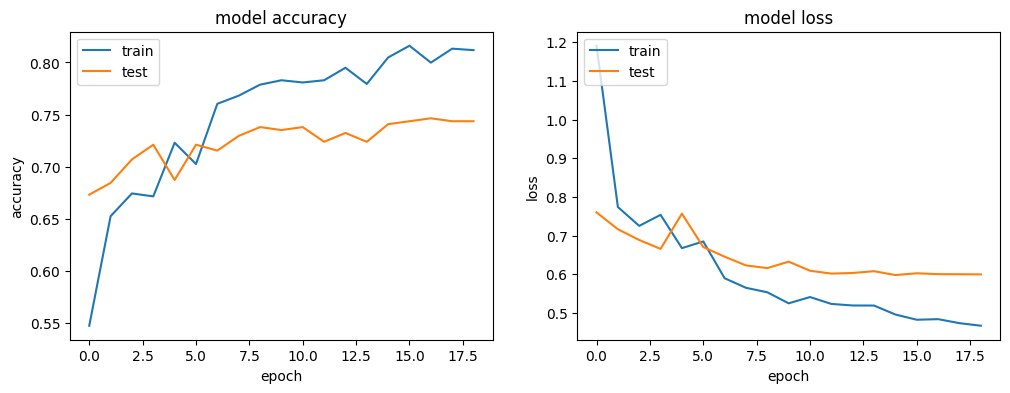

In [ ]:
import matplotlib.pyplot as plt

# plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(PretrainedModelHistory.history['accuracy'])
plt.plot(PretrainedModelHistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(PretrainedModelHistory.history['loss'])
plt.plot(PretrainedModelHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

12/12 [==============================] - 1s 102ms/step


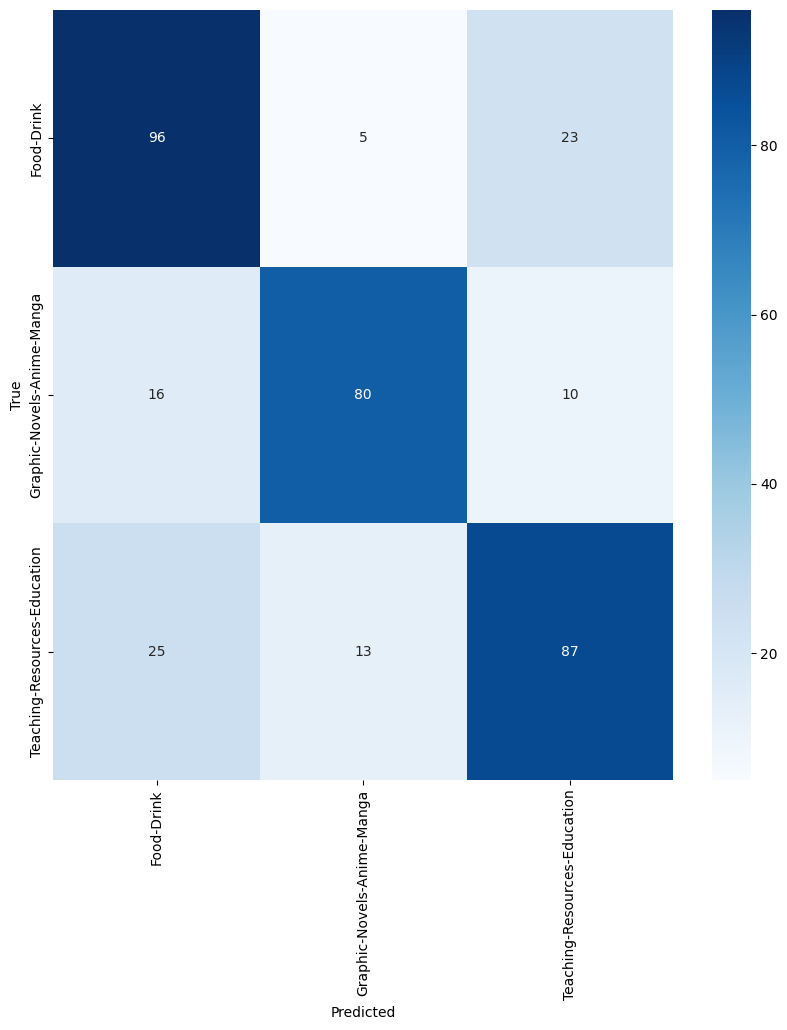

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'val_images' is your validation set and 'val_labels' are the true labels
# First, you need to get predictions from your model
predictions = PretrainedModel.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(val_labels_one_hot, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

class_names = list(label_encoder.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes, target_names=class_names))


                              precision    recall  f1-score   support

                  Food-Drink       0.70      0.77      0.74       124
  Graphic-Novels-Anime-Manga       0.82      0.75      0.78       106
Teaching-Resources-Education       0.72      0.70      0.71       125

                    accuracy                           0.74       355
                   macro avg       0.75      0.74      0.74       355
                weighted avg       0.74      0.74      0.74       355



### Conclusions


The accuracy and loss plots for the VGG16-based model show a consistent improvement in training accuracy over epochs, indicating that the model is learning effectively from the training data. However, the test accuracy remains relatively flat, suggesting that the model is not generalizing as well to unseen data. This could be an indication of overfitting, where the model is becoming too specialized to the training data and not maintaining flexibility to apply what it has learned to new, unseen examples.

The confusion matrix shows that the model has a tendency to predict the majority class for many instances, which is a common issue when dealing with imbalanced datasets. However, if you refer back to the Class Distribution chart you'll see that the Classes are evenly balanced, this can mean the following:

* **Feature Overlap:** There could be similarities in features between classes that the model is exploiting, leading to misclassification.

* **Model Capacity:** The model might not have sufficient capacity to learn the complexity of the data. While VGG16 is a powerful model, sometimes the fine-tuning process may not be optimal, and the model might not learn the distinguishing features for each class effectively.

* **Data Representation:** Even with a balanced dataset, the way data is represented to the model might cause biases. For example, if certain features are more prominent or easier to learn in one class, the model might favor that class.

* **Quality of Data:** The quality of data can affect the training, where some classes may have clearer or more consistent images than others, leading to biased learning.

In the Classification Report, the model is performing moderately well across all classes, with a slight advantage in predicting the Food-Drink class over others. However, since all metrics are in the range of 0.61 to 0.67, there is room for improvement. Strategies for improvement could include more sophisticated data augmentation, error analysis to understand where the model is making mistakes, and potentially using a different architecture or fine-tuning strategy to better capture the nuances between classes.



# Saving the Best Model

So the pre-trained model out performed the rest... so we're going to save this model and use it in a web api utilizing the FastAPI framework from Python

In [ ]:
# This will save your model to the Colab runtime disk
PretrainedModel.save('class_example_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

files.download('class_example_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>